# Name: Chloe Wohlgemuth
### COSC247
### Regression Assignment

## Assignment Instructions
Use any regression method (but not logistic regression, which is not actually a regression method!) to produce a model for data of your choosing.

You must use a dataset with at least 500 instances, and you cannot use the Boston housing dataset used in class. You may use the same dataset as a fellow student, as long as you don't use the same dataset and perform the same analysis as anyone else, as far as you know. You should include your dataset with your submission.

Your notebook should perform at least the following steps:
- Read in your data.
- Divide the data into training and testing sets.
- Train a regression model on the training set.
- Report the R^2 value of the trained model on the training and testing sets.

Include the following information in markdown cells in your notebook:
- A description of the data that you are using
- A description of regression task that you are training your models to perform
- A description of the regression method that you are using
- Your assessment of the quality and usefulness of the results

Although you are only required to turn in the results of one model, trained with one set of parameters, you are encouraged to experiment with more and to report on the results of those experiments.

You are encouraged to collaborate with classmates in completing this assignment, but you should acknowledge all help that you have received in your notebook file.

You can assume that your code will be run in a Python 3.8 environment in which numpy, matplotlib, pandas, scikit-learn, gplearn, and pyshgp have been installed. Do not assume or require the installation of any other libraries.

Your should submit your notebook (.ipynb) file, your data file (probably a .csv file), and any other files that your code requires.

## Dataset Info
This is a dataset that consists of various features of NASA confirmed planets. The pertinent ones are:
* Orbital Period [days]
* Orbit Semi-Major Axis [au]
* Stellar Mass [solar mass]

#### Source
Data was produced by the NASA Exoplanet Archive: http://exoplanetarchive.ipac.caltech.edu
* Confirmed planets --> https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets
* Downloaded the table as a CSV file --> My file name: planets_2020.09.03_20.35.38.csv
* BUT, for ease of filename usage, I renamed to: planets090320.csv

## Purpose
The purpose in studying this dataset is to classify and compare planetary systems, specifically with regards to their quantitative properties. Plotting and relating these properties can provide insight on the interactions and correlations between them. This can be an important task because of the different properties, compositions, behaviors, etc. of different classes (i.e. by mass or orbital behaviors) of planets. This has effects on their motion, aging, reactions (chemical, atmospheric, etc), interactions with space and bodies around them, etc. Our very understanding of the universe can be based on our studies of the different celestial bodies. 

We train a Linear Regression Gradient Descent model to regress a planet's orbital period based on semi-major axis and solar mass. Linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Gradient descent is an iterative optimization algorithm to find the minimum of a function; Here, taht function is the distance or "offness" between the data and the (linear) model.

Our data will include each planet's (features) semi-major axis (a) and solar mass (M), from which the target is orbital period

![period axis relation](https://wikimedia.org/api/rest_v1/media/math/render/svg/5b194cc4755850e6ca14bcc1adc14ecb089b81bf)


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Process Dataset

In [2]:
#read in the data, skipping the first 73 rows of ancillary information
data = pd.read_csv('planets090320.csv', skiprows=76)
data = data[data['pl_bmassj']<13]
data = data[data['pl_orbper']<15000]

#drop rows with NaN values in these columns
data = data.dropna(subset = ['pl_orbsmax','pl_orbper','st_mass'])
data = data.reset_index()

#find the indices of all planet entries
inds = [j for j in range(len(data)) if data['pl_bmassj'][j]<13]

# dataframes for plotting
y = data['pl_orbper'].to_numpy() # Orbital Period (index 7)
X = data.iloc[inds,[11,63]].to_numpy() # semi-major axis and Solar Mass

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

print("Number of Data Points: " + str(len(X)))
print("Number of Training Points: " + str(len(X_train)))
print("Number of Testing Points: " + str(len(X_test)))

Number of Data Points: 1293
Number of Training Points: 775
Number of Testing Points: 518


## Plot Dataset

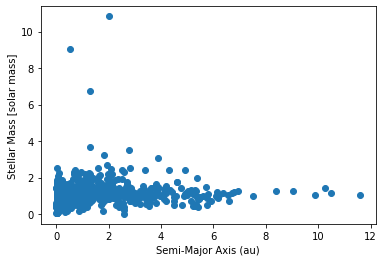

In [3]:
# plot data
plt.scatter(x=X[:,0], y=X[:,1])
plt.xlabel('Semi-Major Axis (au)')
plt.ylabel('Stellar Mass [solar mass]')
plt.show()

## Training LinearRegressionGD

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

##################

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
est = LinearRegressionGD()
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.083, test: 0.290
R^2 train: 0.917, test: 0.867


## Results Summary
The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The MSE for the training data (0.083) is very low and relatively low , indicating that the regression model does well in representing the data relationship. 

The R^2 value is a goodness-of-fit measure for regression models. It indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. The strength of this model to dependent variable relationship is on a 0–100% scale. The linear regression GD model strongly represented the training set, with 91.7%, and adaquately represented the testing set, with 86.7%. 

Both statistics illustrate that the model performed less well with the testing set than training set, but both were pretty well represented. There may have been arguably a recognizable, though not conclusively significant, deviation based on the MSE measure.